In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('../data/indian_liver_patients.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:

df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

In [6]:
# dropping the rows having null/missing values
# saving dataframe into z variable
z = df.fillna(" ")

In [7]:
# checking if dataframe has any null values left

z['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [8]:
# dropping the target class and saving dataframe into X variable
X = z.drop('Label', axis=1)

# storing Label column in y variable
y = df['Label']

# displaying the dataframe shapes 
print(X.head(3))
print(y.head(3))

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   

   Albumin Albumin_and_Globulin_Ratio  
0      3.3                        0.9  
1      3.2                       0.74  
2      3.3                       0.89  
0    1
1    1
2    1
Name: Label, dtype: int64


In [9]:
y.shape

(583,)

In [10]:
X.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [11]:
X.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000


In [12]:
X.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4


In [13]:
X.shape


(583, 10)

In [14]:
# saving all the cloumns into cols variable
cols =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
cols

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [15]:
#importing label encoder to transform string values into numericals

from sklearn.preprocessing import LabelEncoder

In [16]:
# le fn of LabelEncoder()

le = LabelEncoder()

In [17]:
#converting all the attribute values to string
X[cols] = X[cols].astype(str)



In [18]:
#converting into numric values by LabelEncoder 

X[cols] = X[cols].apply(LabelEncoder().fit_transform)
X.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,56,0,3,0,78,35,46,34,21,32
1,53,1,18,62,245,120,1,41,20,24
2,53,1,101,53,210,115,143,36,21,31
3,49,1,6,3,73,23,55,34,22,38
4,63,1,76,36,87,67,131,39,12,5


In [19]:
#need to normalize data with scikit learn
sc = StandardScaler()

scaler =sc.fit_transform(X[cols].iloc[:,range(0,10)].values)



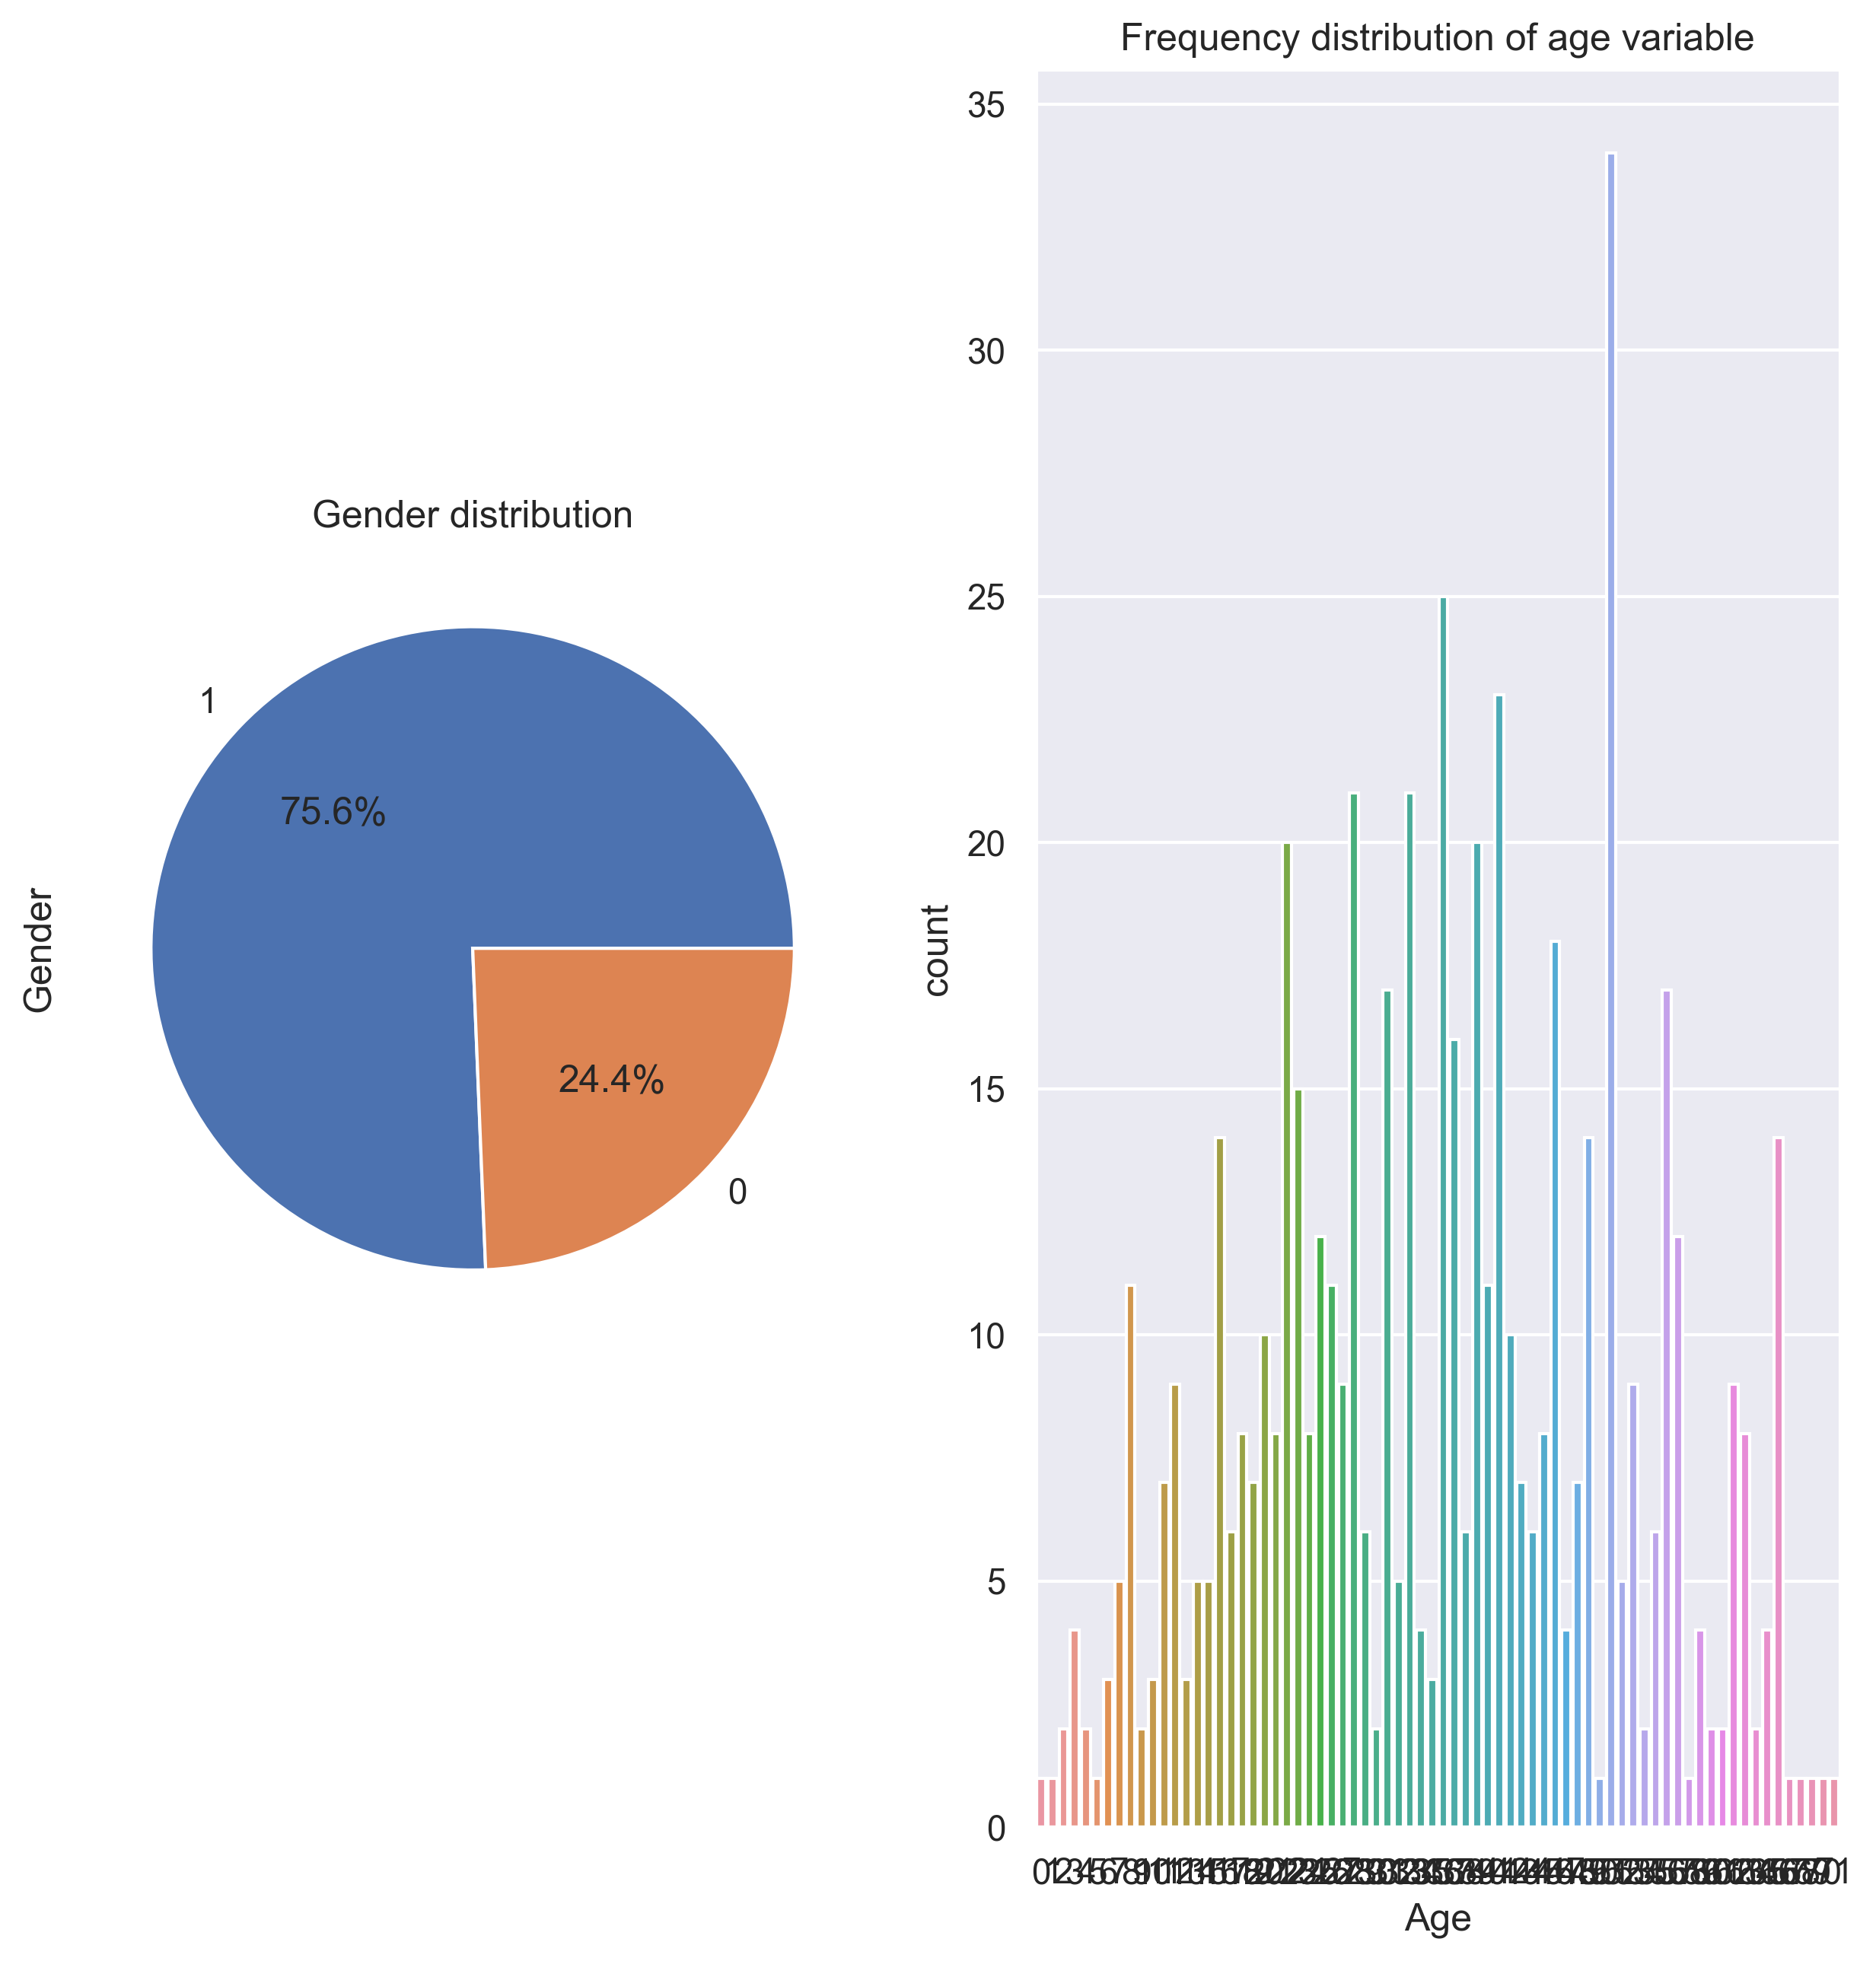

In [20]:
#visualizing frequency distribution of the age variable
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0] = X['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Gender distribution')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x='Age', data=X)
ax[1].set_title("Frequency distribution of age variable")
plt.show()

<AxesSubplot: >

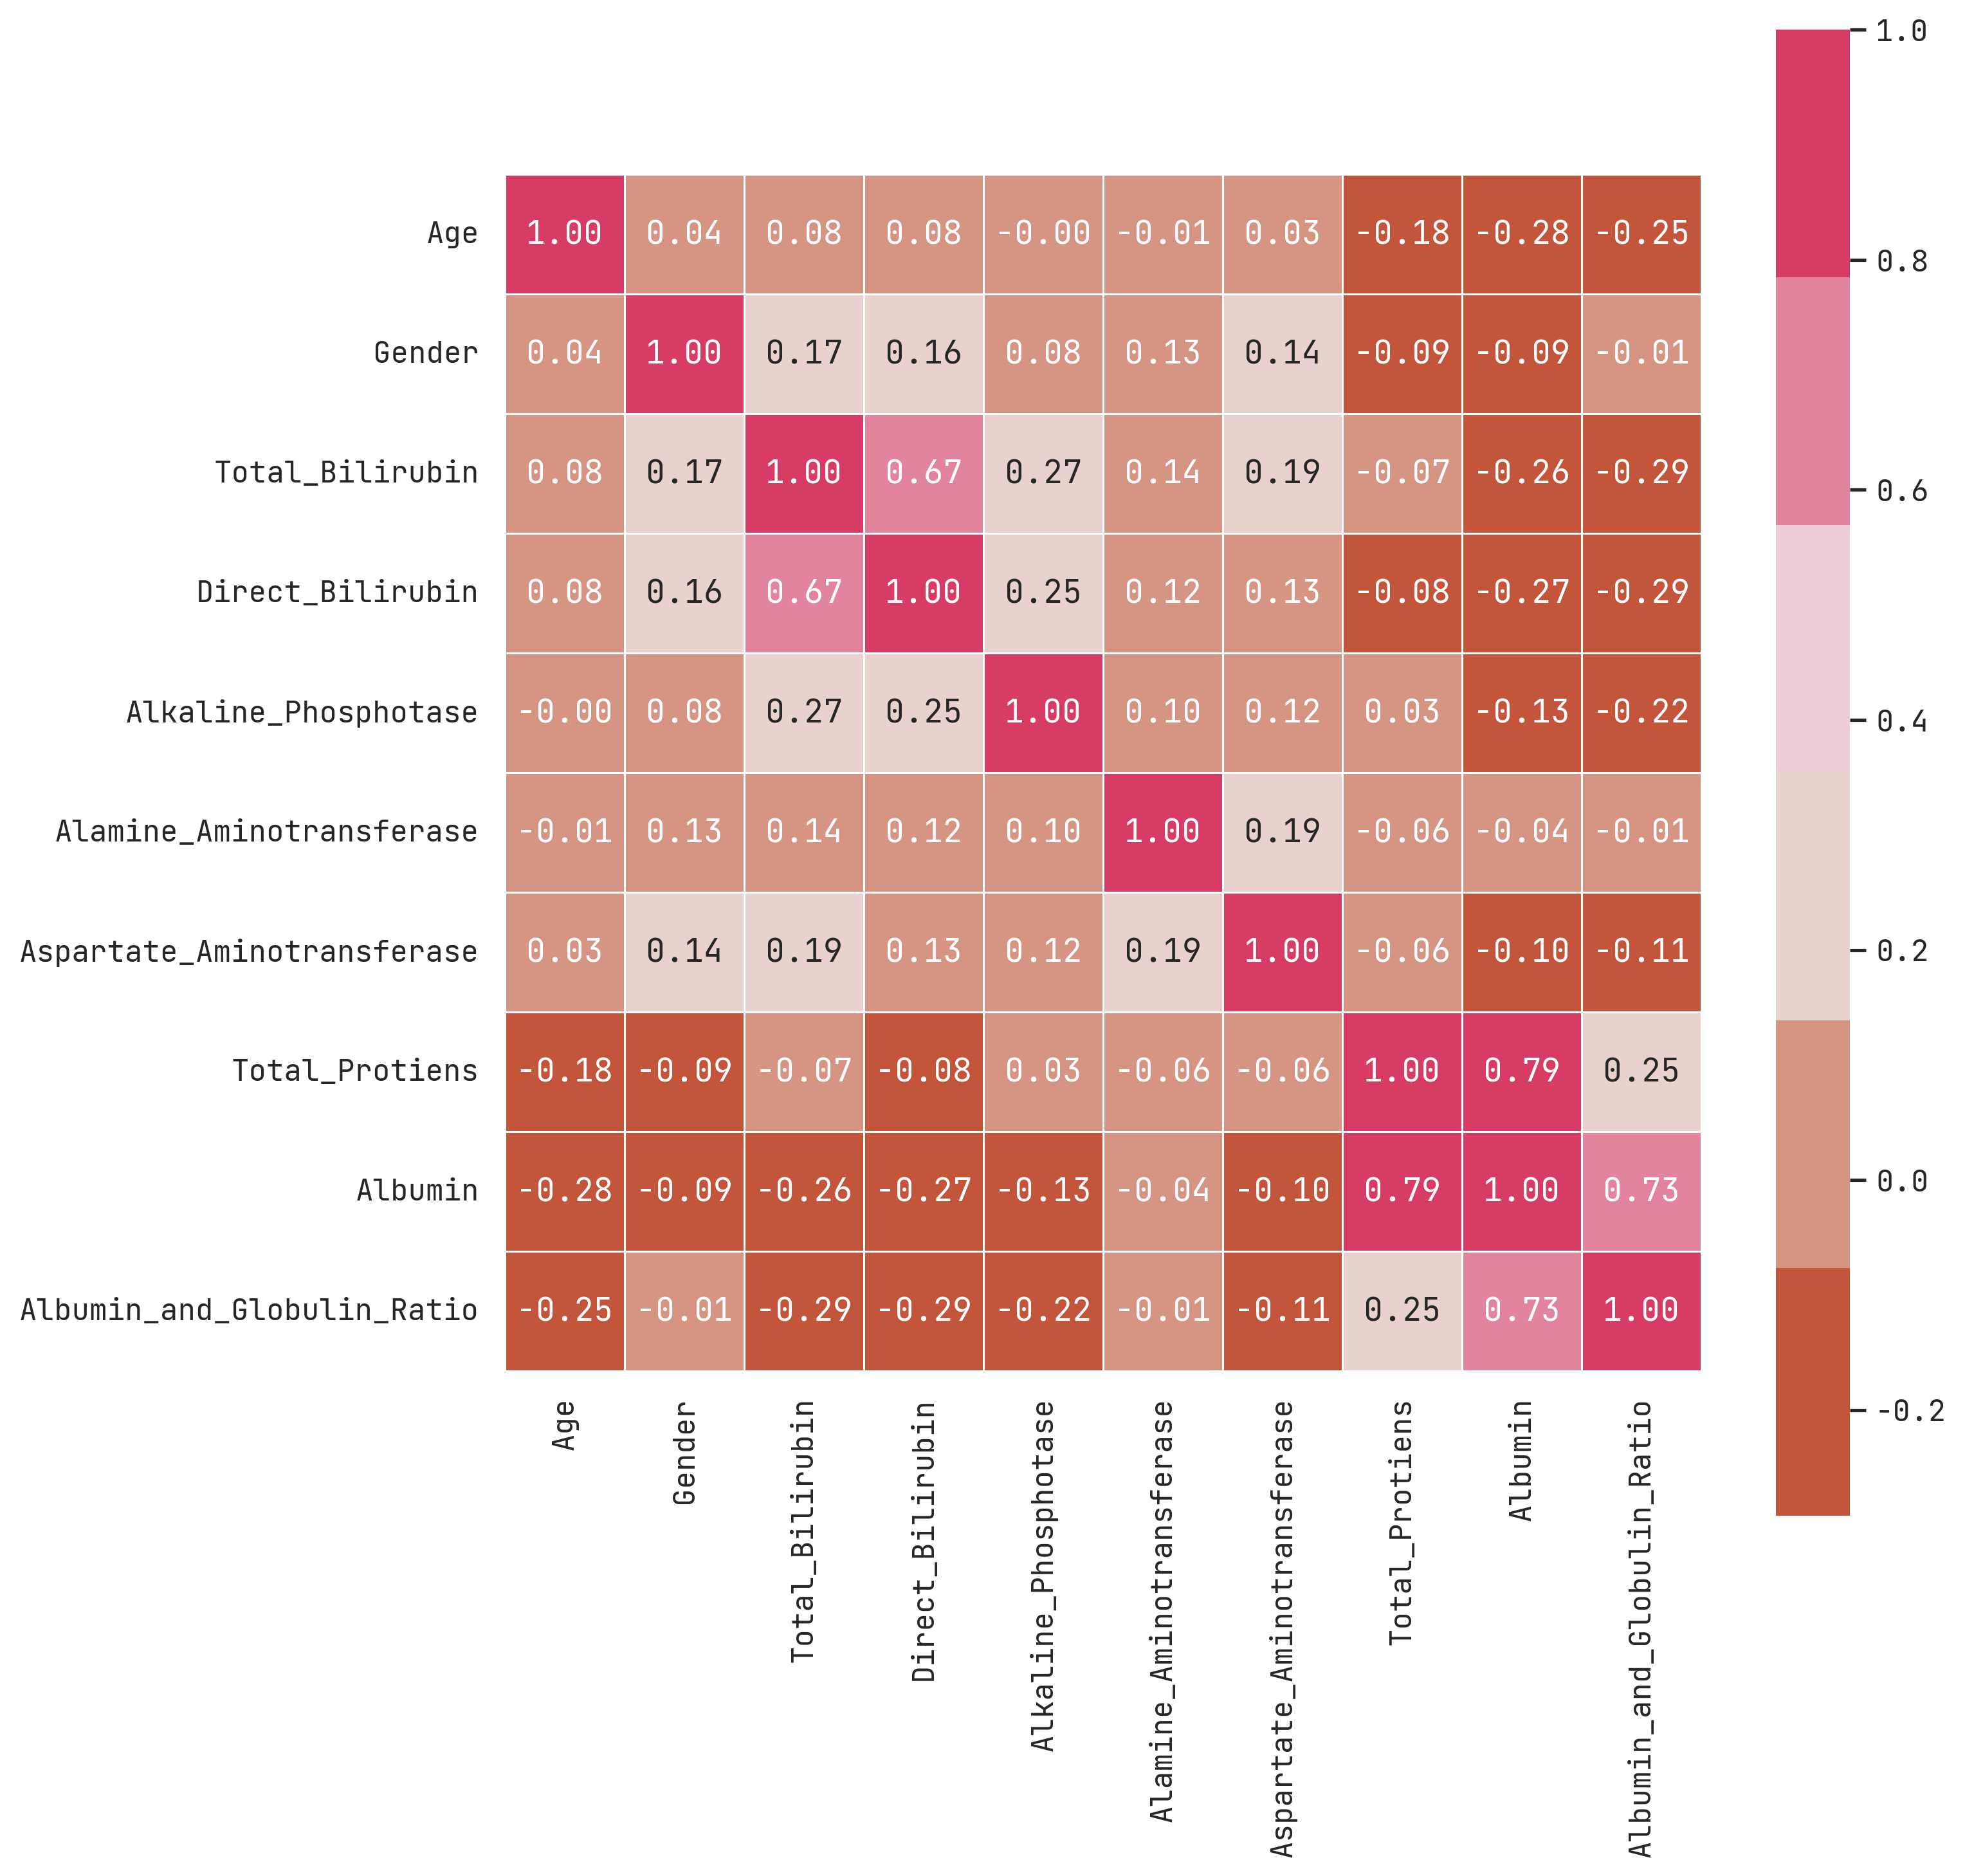

In [23]:
#heatmap plot to check correlation between attributes
correlations = X.corr()

sns.set_theme(style ='dark',font='jetbrains mono',font_scale=1, palette = 'rocket_r')

cmap = sns.diverging_palette(20,2)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap( correlations,
            fmt='0.2f',cmap=cmap,
            square = True,
            linewidths = 0.7,
            annot = True,
            ax=ax)

In [25]:
#splitting data into training and testing parts
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state= 150)

## **1. Logistic Regression**

In [26]:
#le is a variable
lg = LogisticRegression()

In [27]:
#training the model
lg.fit(X_train,y_train)

D:\ml2\ml2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#prediction

lg_predict  = lg.predict(X_test)
lg_score = round(lg.score(X_train, y_train) * 100, 2)
lg_score_test = round(lg.score(X_test, y_test) * 100, 2)

In [29]:
#print the scores and predictions
print("Logistic Regression Training Score: \n",lg_score)
print("Logistic Regression Training Score Test: \n",lg_score_test)
print("Logistic Regression Accuracy: \n",accuracy_score(y_test,lg_predict)*100)
print("Confusion Matrix : \n",confusion_matrix(y_test,lg_predict))
print('Classification Report: \n', classification_report(y_test,lg_predict))

Logistic Regression Training Score: 
 72.3
Logistic Regression Training Score Test: 
 70.29
Logistic Regression Accuracy: 
 70.28571428571428
Confusion Matrix : 
 [[108  20]
 [ 32  15]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.84      0.81       128
           2       0.43      0.32      0.37        47

    accuracy                           0.70       175
   macro avg       0.60      0.58      0.59       175
weighted avg       0.68      0.70      0.69       175



<AxesSubplot: >

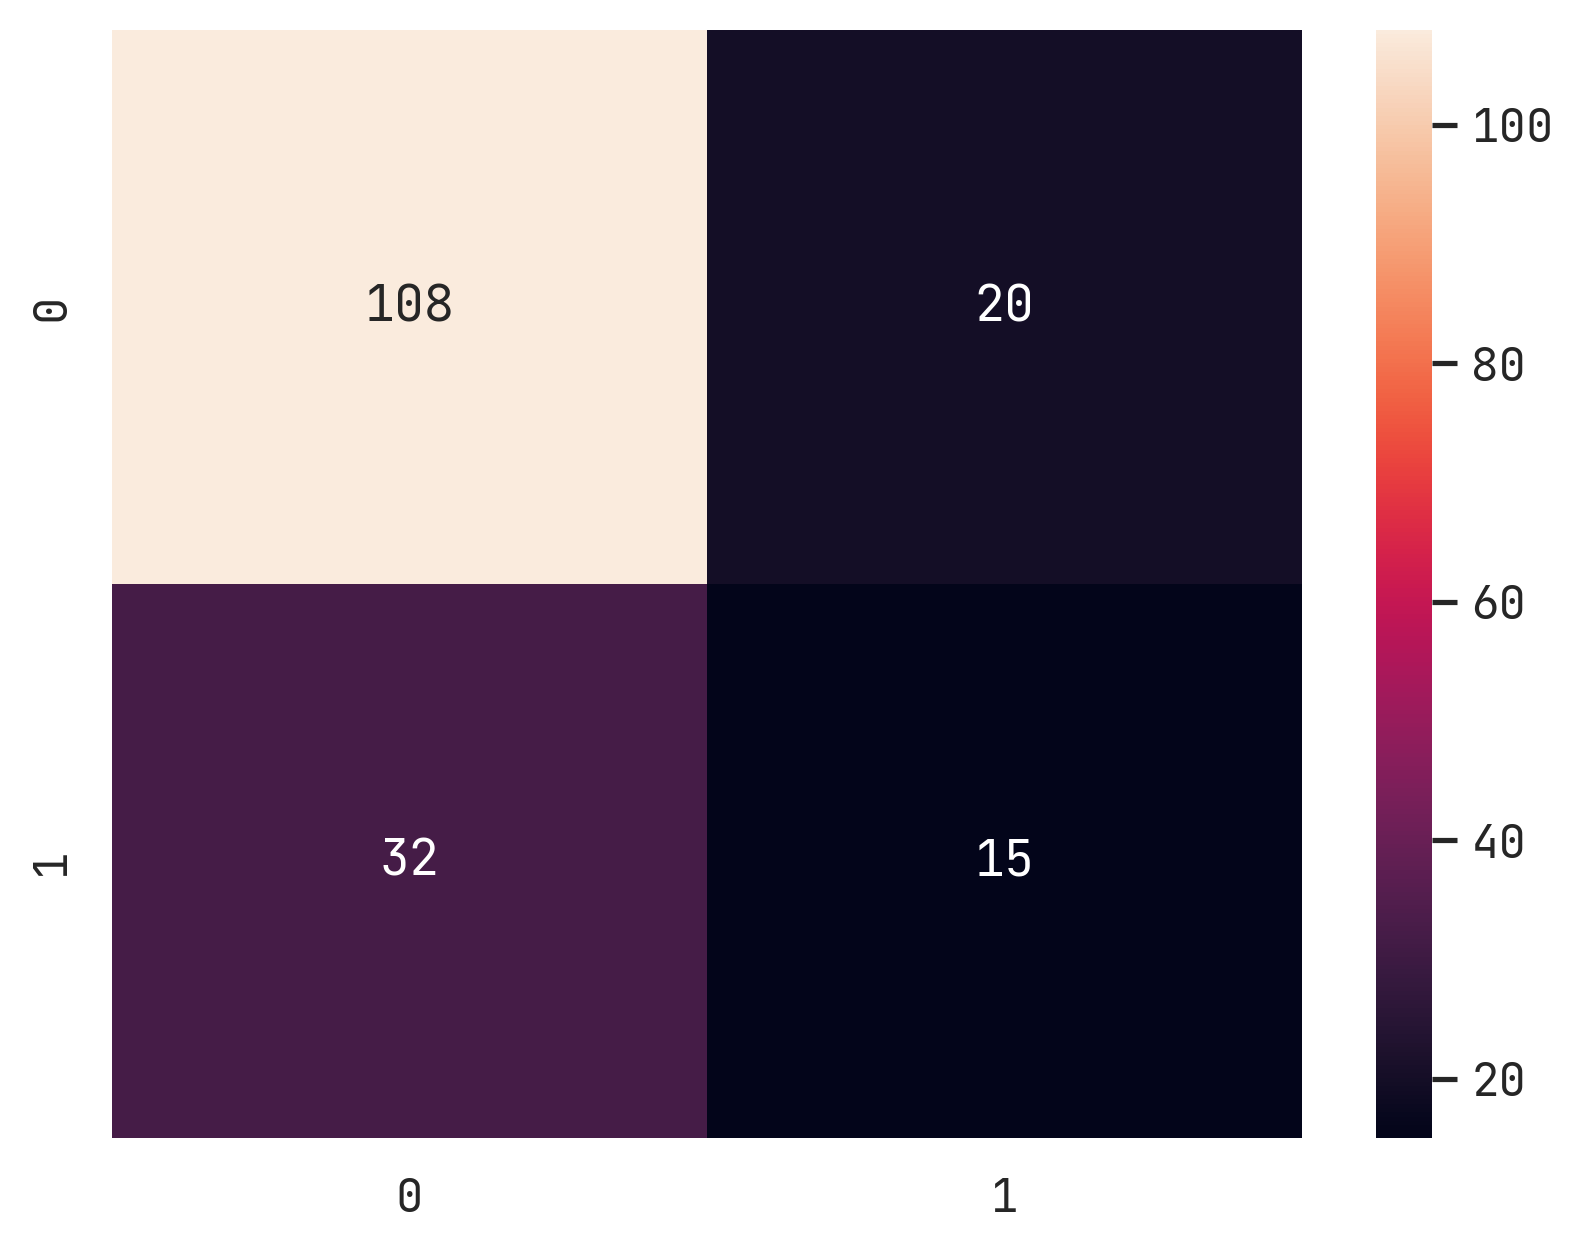

In [30]:
sns.heatmap(confusion_matrix(y_test,lg_predict),annot=True,fmt= 'd')

## **Decision Tree Classifier**

In [31]:
dtc = DecisionTreeClassifier()

In [32]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
#predicting the output here

dtc_pred = dtc.predict(X_test)

In [34]:
dtc_score = round(dtc.score(X_train, y_train) * 100, 2)
dtc_test = round(dtc.score(X_test, y_test) * 100, 2)

In [36]:
# using accuracy score package
print("Accuracy Score:",accuracy_score(y_test,dtc_pred)*100,"%")

Accuracy Score: 65.14285714285715 %


In [38]:
#displaying confusision matrix 
confusion_matrix(y_test,dtc_pred)

array([[97, 31],
       [30, 17]], dtype=int64)

## **Random Forest Classifier**

In [39]:
rf = RandomForestClassifier(max_depth=3,n_estimators=100,criterion='entropy')

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [42]:
rf_predicted = rf.predict(X_test)

In [43]:

random_forest_score = round(rf.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(rf.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted)*100,"%")
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))


Random Forest Score: 
 74.51
Random Forest Test Score: 
 72.0
Accuracy: 
 72.0 %
[[121   7]
 [ 42   5]]
              precision    recall  f1-score   support

           1       0.74      0.95      0.83       128
           2       0.42      0.11      0.17        47

    accuracy                           0.72       175
   macro avg       0.58      0.53      0.50       175
weighted avg       0.65      0.72      0.65       175



## **Gaussian Naive Bayes**

In [ ]:
gb = GaussianNB()

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
GaussianNB(priors=None)

In [ ]:
#predicting the output
gauss_predicted = gb.predict(X_test)

In [ ]:
gauss_score = round(gb.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gb.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted)*100)
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

In [ ]:
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

## **Model Evaluation**

In [ ]:
#creating a dataframe for all the scores and test scores find out which one works best for this particular example

models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','Decision Tree'],
    'Score': [ lg_score, gauss_score, random_forest_score,dt_score],
    'Test Score': [ lg_score_test, gauss_score_test, random_forest_score_test,dt_test]})
models.sort_values(by='Test Score', ascending=False)